After the 2020 US presidential election, a theory circled (mainly among classical liberals) that the election was a victory for moderates: in the sense that Trump lost the presidency but Democrats failed to win over the Senate (which would have given them substantial legislative power). 

I was curious to see if the 2020 election was an outlier in terms of a vote percentage discrepancy between the Presidential and Senate races. This was done by looking at voting data on a state-by-state basis, looking at the dominance of parties based on vote shares in Presidential and Senate elections. 

I'm using data from MIT:s Election Data and Science Lab (MEDSL). By the looks of it, 2020 did not show a large discrepancy in Republican vote shares per state between Presidential and Senate races. On the contrary, the vote percentage gap seems to be smaller than ever. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Special functions for this purpose
from functions import vote_shares, join_regular_special_elections, votes_by_state_party_year, visualise_federal_level, visualise_state_level, visualise_votes_per_party

In [2]:
# https://dataverse.harvard.edu/dataverse/medsl_election_returns
pres = pd.read_csv('../1_Data/mit/1976-2020-president.csv', encoding='unicode_escape')
senate = pd.read_csv('../1_Data/mit//1976-2020-senate.csv', encoding='unicode_escape')
house = pd.read_csv('../1_Data/mit//1976-2018-house3.csv', encoding='unicode_escape')

In [3]:
house.sample(3)

,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,runoff,special,candidate,party,writein,mode,candidatevotes,totalvotes,unofficial,version,fusion_ticket
18045,2002,OHIO,OH,39,31,24,US HOUSE,3,gen,False,False,RONALD WILLIAMITIS,INDEPENDENT,False,TOTAL,14,189951,False,20201202,False
16581,2000,NORTH DAKOTA,ND,38,44,36,US HOUSE,0,gen,False,False,JOHN DORSO,REPUBLICAN,False,TOTAL,127251,285658,False,20201202,False
25612,2014,CALIFORNIA,CA,6,93,71,US HOUSE,45,gen,NaN,False,MIMI WALTERS,REPUBLICAN,False,TOTAL,106083,162902,False,20201202,False


In [4]:
house = (
    house
    .rename(columns={'party': 'party_simplified'})
)

In [5]:
house.year.unique()

array([1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996,
       1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])

## Aggregate and merge data from Presidential, Senate and House races per state, party and year

In [6]:
vote_shares = votes_by_state_party_year(house_data=house, senate_data=senate, pres_data=pres)

In [7]:
vote_shares.sample(5)

,state,year,party_simplified,PRES_candidate_votes,PRES_total_votes,PRES_share_of_votes,SENATE_candidate_votes,SENATE_total_votes,SENATE_share_of_votes,HOUSE_candidate_votes,HOUSE_total_votes,HOUSE_share_of_votes,PRES_minus_SENATE_diff,PRES_minus_HOUSE_diff,SENATE_minus_HOUSE_diff
510,GEORGIA,2020,DEMOCRAT,2473633,4999960,0.495,2378312.0,4914361.0,0.484,NaN,NaN,NaN,0.011,NaN,NaN
1465,NEW MEXICO,1984,OTHER,1041,514370,0.002,10.0,502634.0,0.000,NaN,NaN,NaN,0.002,NaN,NaN
90,ALASKA,2020,LIBERTARIAN,8897,359530,0.025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1910,SOUTH CAROLINA,2020,LIBERTARIAN,27916,2514096,0.011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2224,WASHINGTON,2012,OTHER,37248,3125516,0.012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualise discrepancies between political races

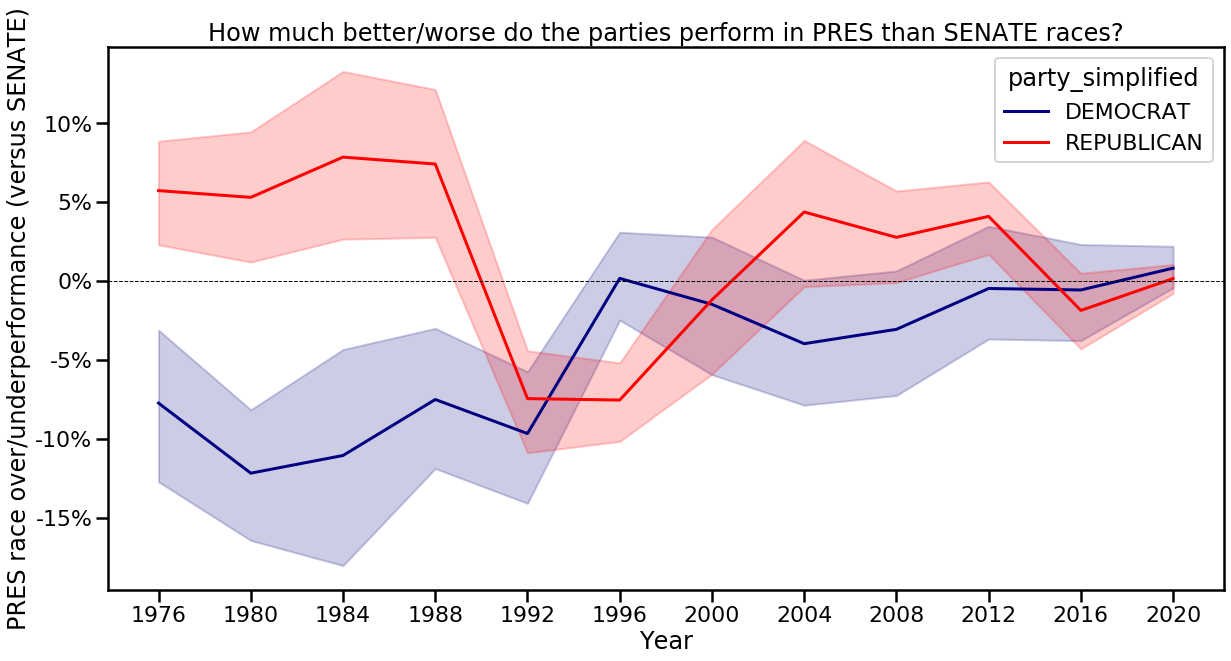

In [8]:
parties = list(["REPUBLICAN", "DEMOCRAT"]) # Select TWO and only TWO parties

visualise_federal_level(election_data=vote_shares, metric='PRES_minus_SENATE_diff', parties=parties)

plt.savefig('../3_Output/federal_level.png', bbox_inches='tight')

<Figure size 720x720 with 0 Axes>

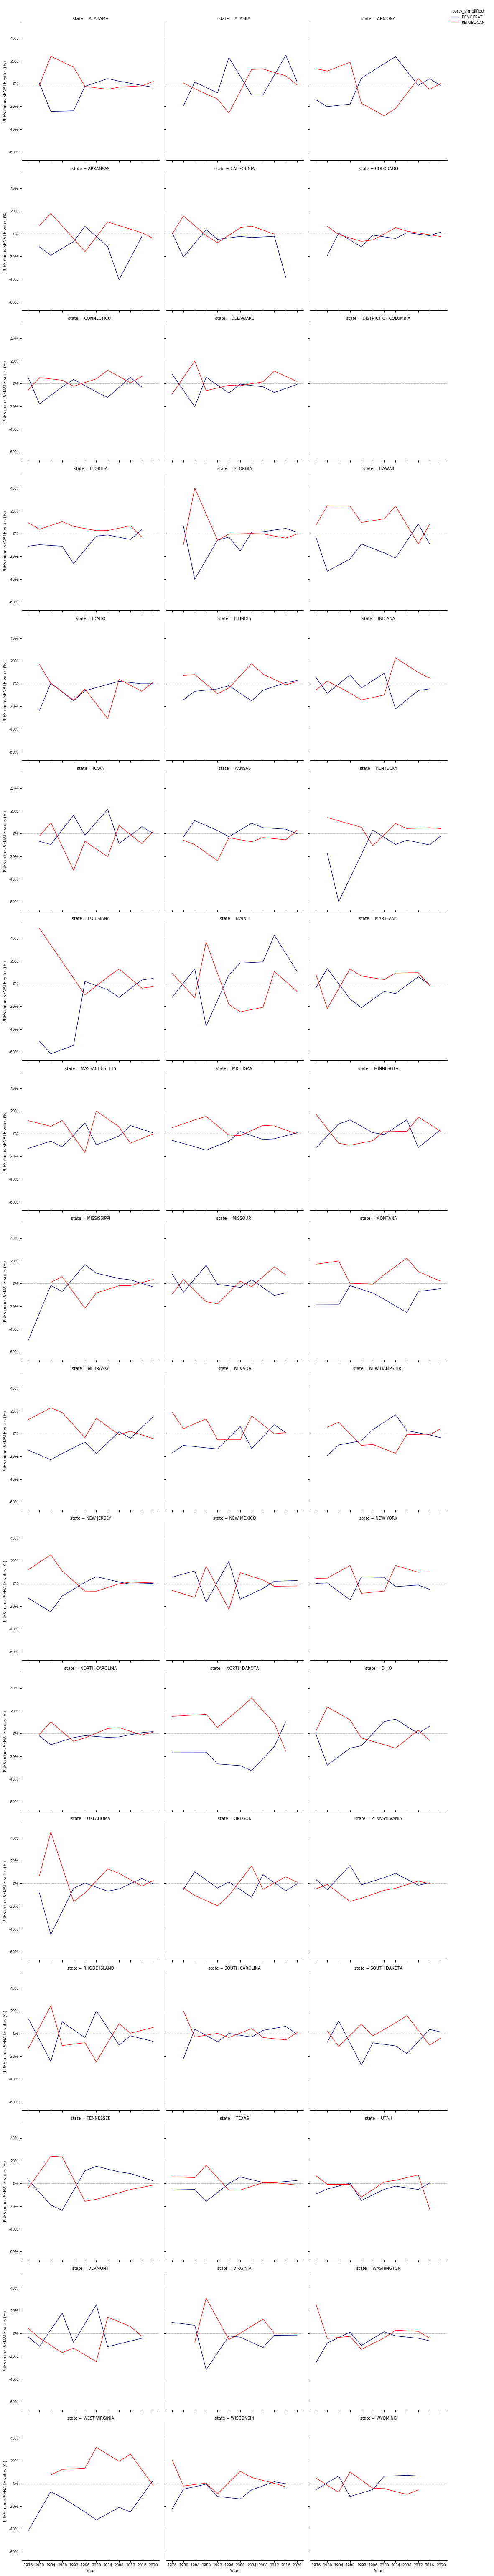

<Figure size 432x288 with 0 Axes>

In [9]:
parties = list(["REPUBLICAN", "DEMOCRAT"]) # Select TWO and only TWO parties

visualise_state_level(election_data=vote_shares, metric='PRES_minus_SENATE_diff', parties=parties);

plt.savefig('../3_Output/state_level.png', bbox_inches='tight')

## Visualise general changes in votes per party, year and political race

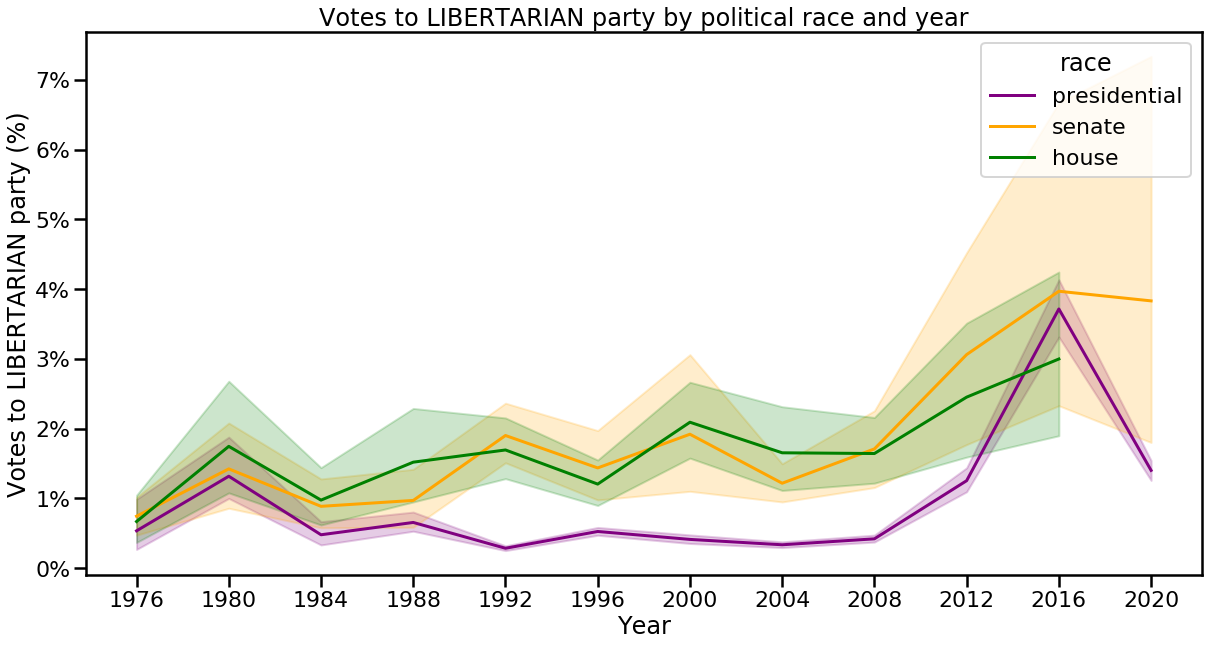

In [10]:
party = ["LIBERTARIAN"] # Select ONE and only ONE party

visualise_votes_per_party(election_data=vote_shares, party=party)

plt.savefig('../3_Output/libertarian_increase.png', bbox_inches='tight')